In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

Titles and Axis Labels
plt.suptitle() adds a title to plots and subplots
plt.title() adds a title to a single plot. Note if you use subplots, it will only put the title on the last subplot, so you will need to use plt.suptitle()
plt.xlabel() labels the x-axis
plt.ylabel() labels the y-axis

Text(0, 0.5, 'price ($)')

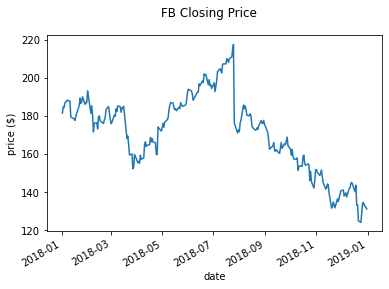

In [2]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

plt.suptitle() vs. plt.title()
Check out what happens when we call plt.title() with subplots:

Text(0, 0.5, 'price ($)')

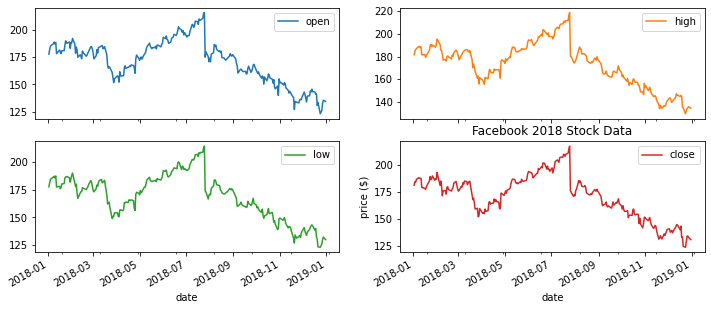

In [3]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Simply getting into the habit of using plt.suptitle() instead of plt.title() will save you this confusion:

Text(0, 0.5, 'price ($)')

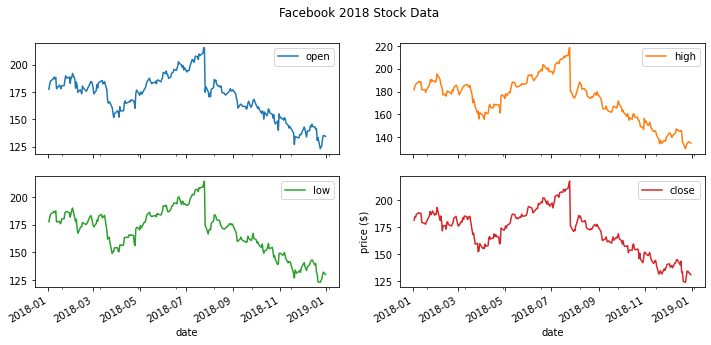

In [4]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Legends
plt.legend() adds a legend to the plot. We can specify where to place it with the loc parameter:

Text(0, 0.5, 'price ($)')

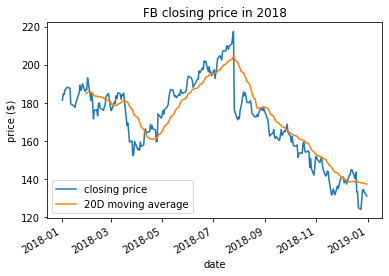

In [5]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'], 
    title='FB closing price in 2018',
    label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

Formatting Axes
Specifying axis limits
plt.xlim() and plt.ylim() can be used to specify the minimum and maximum values for the axis. Passing None will have matplotlib determine the limit.

Text(0, 0.5, 'price ($)')

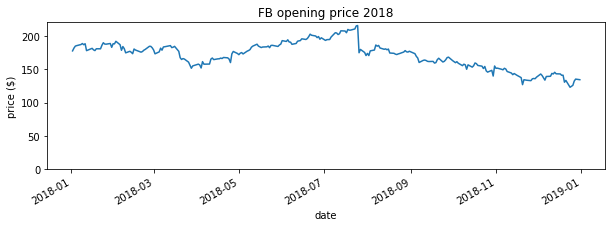

In [6]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

Formatting the Axis Ticks
We can use plt.xticks() and plt.yticks() to provide tick labels and specify, which ticks to show. Here, we show every other month:

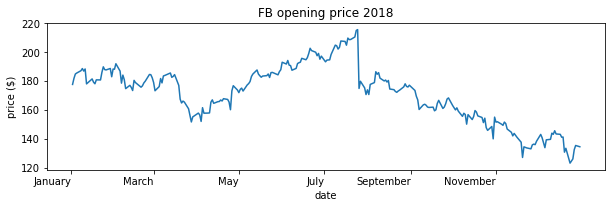

In [7]:
import calendar

import calendar
import matplotlib.pyplot as plt

# Plot the data
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')

# Get the tick locations
locs, labels = plt.xticks()

# Adjust the locations and ensure the number of ticks matches the number of labels
new_locs = locs[:len(calendar.month_name[1::2])]  # Trim locs to match the number of labels
new_labels = calendar.month_name[1::2]           # Use the desired labels

plt.xticks(new_locs, new_labels)                 # Set the new tick locations and labels
plt.ylabel('price ($)')
plt.show()

Using ticker
PercentFormatter
We can use ticker.PercentFormatter and specify the denominator (xmax) to use when calculating the percentages. This gets passed to the set_major_formatter() method of the xaxis or yaxis on the Axes.

Text(0, 0.5, 'percent of highest price ($218.62)')

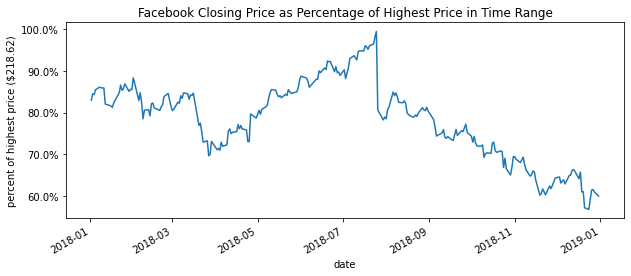

In [8]:
import matplotlib.ticker as ticker

ax = fb.close.plot(
    figsize=(10, 4), 
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
    fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

MultipleLocator
Say we have the following data. The points only take on integer values for x.

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

If we don't want to show decimal values on the x-axis, we can use the MultipleLocator. This will give ticks for all multiples of a number specified with the base parameter. To get integer values, we use base=1:

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
    ticker.MultipleLocator(base=1)
)